# Data analyst

## Load libraries

In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [33]:
os.path.dirname('.')

''

In [34]:
os.path.abspath('.')

'c:\\src\\theBridge\\proyectos\\indoor_localisation_from_smartdevices\\src\\notebooks'

In [35]:
ROOT_PATH = os.pardir

RAW_DATA_PATH = ROOT_PATH + '\\data\\raw\\'

PROC_DATA_PATH = ROOT_PATH + '\\data\\proc\\'

# print(os.path.abspath(os.pardir))


## Load points data

In [36]:
points_df = pd.read_excel(RAW_DATA_PATH + 'PointsMapping.ods', engine='odf', index_col=0)
points_df.head()

,X,Y
ID,,
1,0.6,0.6
2,1.2,0.6
3,1.8,0.6
4,0.6,1.2
5,1.8,1.2


In [37]:
points_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 1 to 325
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       325 non-null    float64
 1   Y       325 non-null    float64
dtypes: float64(2)
memory usage: 7.6 KB


In [38]:
points_df.iloc[0, 0]

0.6

In [39]:
points_df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            316, 317, 318, 319, 320, 321, 322, 323, 324, 325],
           dtype='int64', name='ID', length=325)

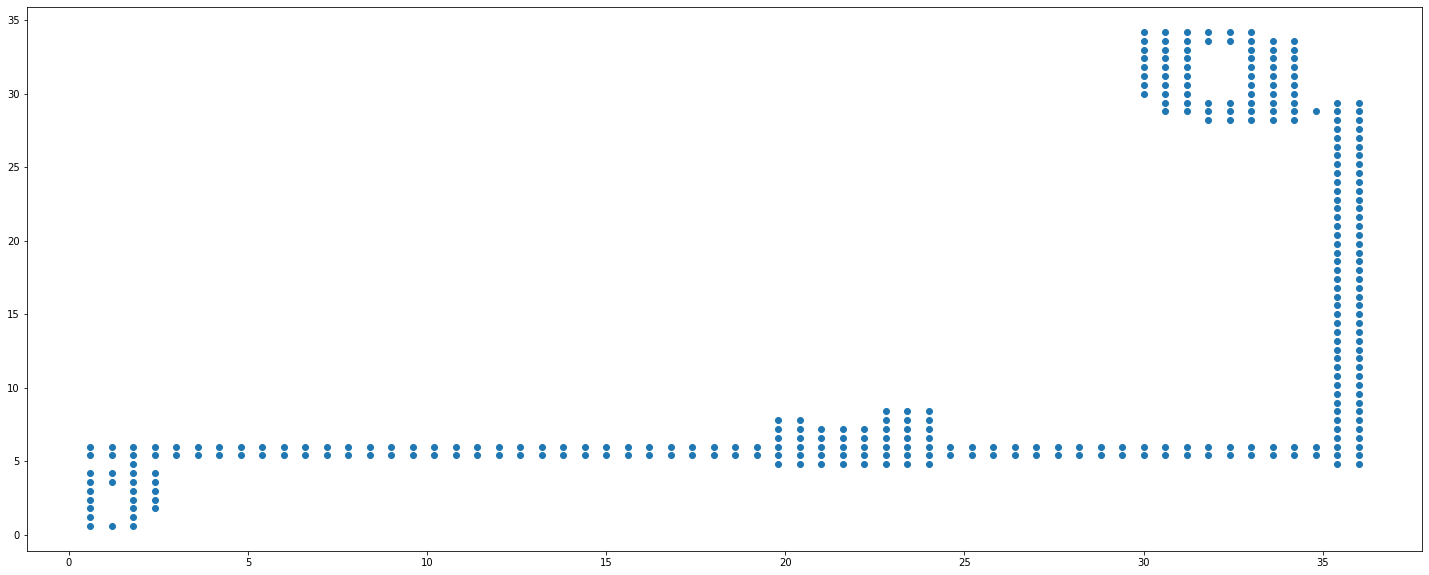

In [40]:
plt.figure(figsize=(25, 10))
plt.scatter(points_df.X, points_df.Y)
# for i, label in enumerate(points_df.index):
#     plt.text(points_df.iloc[i, 0], points_df.iloc[i, 1], label)

In [41]:
import plotly.express as px

fig = px.scatter(points_df, x="X", y="Y", text=range(0, 325))

fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='Points of the experiment'
)

fig.show()

## Load measure 1 data

### Smartphone sensors

In [42]:
m1_sphone_df = pd.read_csv(RAW_DATA_PATH + 'measure1_smartphone_sens.csv')
m1_sphone_df.columns = m1_sphone_df.columns.str.strip()

In [43]:
m1_sphone_df.insert(0, 'datetime', pd.to_datetime(m1_sphone_df['timestamp'], unit='ms'))
m1_sphone_df.head()

,datetime,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
0,2015-01-30 14:51:23.421,1422629483421,-3.577,2.104,9.078,-5.4,-17.9,-28.2,126.404,-12.169,-21.001,0,0,0
1,2015-01-30 14:51:23.520,1422629483520,-3.424,2.927,9.374,-4.3,-21.9,-26.9,134.694,-11.322,-25.898,0,0,0
2,2015-01-30 14:51:23.620,1422629483620,-2.505,2.908,8.867,-0.7,-24.4,-26.5,150.906,-17.523,-15.017,0,0,0
3,2015-01-30 14:51:23.723,1422629483723,-5.473,1.472,9.394,0.3,-25.7,-26.9,138.022,-21.068,-23.941,0,0,0
4,2015-01-30 14:51:23.822,1422629483822,-3.414,2.018,8.187,3.7,-29.6,-23.9,163.519,-12.814,-22.046,0,0,0


In [44]:
m1_sphone_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18354 entries, 0 to 18353
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             18354 non-null  datetime64[ns]
 1   timestamp            18354 non-null  int64         
 2   AccelerationX        18354 non-null  float64       
 3   AccelerationY        18354 non-null  float64       
 4   AccelerationZ        18354 non-null  float64       
 5   MagneticFieldX       18354 non-null  float64       
 6   MagneticFieldY       18354 non-null  float64       
 7   MagneticFieldZ       18354 non-null  float64       
 8   Z-AxisAgle(Azimuth)  18354 non-null  float64       
 9   X-AxisAngle(Pitch)   18354 non-null  float64       
 10  Y-AxisAngle(Roll)    18354 non-null  float64       
 11  GyroX                18354 non-null  int64         
 12  GyroY                18354 non-null  int64         
 13  GyroZ                18354 non-

In [45]:
m1_sphone_df.describe()

,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
count,1.835400e+04,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.0,18354.0,18354.0
mean,1.422859e+12,-0.296746,4.211019,8.288839,-1.157590,-7.415054,-29.640253,168.779099,-25.079180,-1.687723,0.0,0.0,0.0
std,1.796786e+08,1.172366,2.326193,1.587541,16.907053,21.466757,11.524140,114.797401,20.257369,7.512564,0.0,0.0,0.0
min,1.422629e+12,-11.563000,-14.702000,-3.285000,-85.900000,-103.300000,-59.800000,0.005000,-114.158000,-79.969000,0.0,0.0,0.0
25%,1.422632e+12,-0.675000,3.196000,7.919000,-15.400000,-27.000000,-38.100000,46.692750,-35.234000,-3.859000,0.0,0.0,0.0
50%,1.422884e+12,-0.331000,4.057000,8.513000,-7.800000,-5.500000,-31.600000,143.816000,-25.197000,-1.936000,0.0,0.0,0.0
75%,1.423044e+12,0.014000,5.724000,8.991000,16.100000,9.300000,-23.300000,307.210250,-19.470000,0.071000,0.0,0.0,0.0
max,1.423128e+12,14.914000,12.781000,14.747000,37.900000,53.100000,37.200000,359.989000,158.389000,80.325000,0.0,0.0,0.0


In [46]:
print(f'The first day of the measure 1 is {m1_sphone_df.datetime.dt.date.min()} and the last day is {m1_sphone_df.datetime.dt.date.max()}.')

The first day of the measure 1 is 2015-01-30 and the last day is 2015-02-05.


### Smartwatch sensors

In [47]:
m1_swatch_df = pd.read_csv(RAW_DATA_PATH + 'measure1_smartwatch_sens.csv')
m1_swatch_df.columns = m1_swatch_df.columns.str.strip()

In [48]:
m1_swatch_df.insert(0, 'datetime', pd.to_datetime(m1_swatch_df['timestamp'], unit='ms'))
m1_swatch_df.head()

,datetime,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
0,2015-01-30 14:38:00.350,1422628680350,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-30 14:38:00.445,1422628680445,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-30 14:38:00.545,1422628680545,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-30 14:38:00.645,1422628680645,0.200,3.653,8.763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-30 14:38:00.744,1422628680744,0.235,3.691,8.867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
m1_swatch_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58374 entries, 0 to 58373
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             58374 non-null  datetime64[ns]
 1   timestamp            58374 non-null  int64         
 2   AccelerationX        58374 non-null  float64       
 3   AccelerationY        58374 non-null  float64       
 4   AccelerationZ        58374 non-null  float64       
 5   MagneticFieldX       58374 non-null  float64       
 6   MagneticFieldY       58374 non-null  float64       
 7   MagneticFieldZ       58374 non-null  float64       
 8   Z-AxisAgle(Azimuth)  58374 non-null  float64       
 9   X-AxisAngle(Pitch)   58374 non-null  float64       
 10  Y-AxisAngle(Roll)    58374 non-null  float64       
 11  GyroX                58374 non-null  float64       
 12  GyroY                58374 non-null  float64       
 13  GyroZ                58374 non-

In [50]:
m1_swatch_df.describe()

,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
count,5.837400e+04,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000
mean,1.422827e+12,1.726072,-7.099805,1.906930,-4.769356,23.568268,0.892316,198.198215,71.880993,10.334409,-0.015220,-0.001513,-0.004305
std,1.798837e+08,4.561547,3.186476,3.317096,20.496038,16.323750,20.937565,126.326150,35.262366,30.202981,0.720377,0.401403,0.308089
min,1.422629e+12,-19.076000,-14.606000,-17.799000,-63.387000,-47.095000,-52.650000,0.000000,-178.445000,-85.213000,-11.303000,-7.641000,-5.946000
25%,1.422631e+12,-0.263000,-9.451000,0.468000,-21.028000,14.026000,-15.063000,74.352000,67.464750,-0.760000,-0.063000,-0.058000,-0.045000
50%,1.422872e+12,1.437500,-7.798000,1.725500,-6.133000,28.342000,2.563500,236.572000,78.120000,7.643500,-0.003000,0.001000,-0.003000
75%,1.423043e+12,5.690000,-6.381500,3.104000,9.082000,35.309000,17.557750,329.231000,85.835000,35.666000,0.059000,0.069000,0.040000
max,1.423128e+12,11.073000,11.105000,14.254000,56.525000,90.747000,58.643000,359.999000,177.019000,78.409000,11.146000,11.972000,4.735000


In [51]:
print(f'The first day of the measure 1 is {m1_swatch_df.datetime.dt.date.min()} and the last day is {m1_swatch_df.datetime.dt.date.max()}.')

The first day of the measure 1 is 2015-01-30 and the last day is 2015-02-05.


### Timestamp

In [52]:
m1_timestamp_df = pd.read_csv(RAW_DATA_PATH + 'measure1_timestamp_id.csv',
                              header=None, names=['arrival_ts', 'departure_ts', 'place_id'])
m1_timestamp_df.head()

,arrival_ts,departure_ts,place_id
0,1422629490743,1422629492743,34
1,1422629495152,1422629499732,94
2,1422629501522,1422629505849,95
3,1422629507213,1422629511556,35
4,1422629513047,1422629517152,36


In [53]:
m1_timestamp_df.insert(0, 'arrival_dt', pd.to_datetime(m1_timestamp_df['arrival_ts'], unit='ms'))
m1_timestamp_df.insert(2, 'departure_dt', pd.to_datetime(m1_timestamp_df['departure_ts'], unit='ms'))

In [54]:
m1_timestamp_df.sort_values(by='arrival_dt').head(10)


,arrival_dt,arrival_ts,departure_dt,departure_ts,place_id
0,2015-01-30 14:51:30.743,1422629490743,2015-01-30 14:51:32.743,1422629492743,34
1,2015-01-30 14:51:35.152,1422629495152,2015-01-30 14:51:39.732,1422629499732,94
2,2015-01-30 14:51:41.522,1422629501522,2015-01-30 14:51:45.849,1422629505849,95
3,2015-01-30 14:51:47.213,1422629507213,2015-01-30 14:51:51.556,1422629511556,35
4,2015-01-30 14:51:53.047,1422629513047,2015-01-30 14:51:57.152,1422629517152,36
5,2015-01-30 14:51:58.651,1422629518651,2015-01-30 14:52:01.776,1422629521776,96
6,2015-01-30 14:52:03.052,1422629523052,2015-01-30 14:52:05.921,1422629525921,97
7,2015-01-30 14:52:07.786,1422629527786,2015-01-30 14:52:10.685,1422629530685,37
8,2015-01-30 14:52:12.364,1422629532364,2015-01-30 14:52:15.214,1422629535214,38
9,2015-01-30 14:52:17.055,1422629537055,2015-01-30 14:52:20.053,1422629540053,98


In [55]:
m1_timestamp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   arrival_dt    324 non-null    datetime64[ns]
 1   arrival_ts    324 non-null    int64         
 2   departure_dt  324 non-null    datetime64[ns]
 3   departure_ts  324 non-null    int64         
 4   place_id      324 non-null    int64         
dtypes: datetime64[ns](2), int64(3)
memory usage: 12.8 KB


In [56]:
print('Samples in place 2:', m1_sphone_df[(m1_sphone_df.timestamp >= 1423127565596) & (m1_sphone_df.timestamp <= 1423127569877)].count()[0])

Samples in place 2: 42


In [57]:
print('Samples in place 3:', m1_sphone_df[(m1_sphone_df.timestamp >= 1423127571881) & (m1_sphone_df.timestamp <= 1423127575826)].count()[0])

Samples in place 3: 40


### Smartphone WIFI

In [58]:
col = [f'WAP{str(num).zfill(3)}' for num in range(1, 128)]

In [59]:
m1_wifi_df = pd.read_csv(RAW_DATA_PATH + 'measure1_smartphone_wifi.csv',
                              header=None, names=col)
m1_wifi_df.index.name = 'id'
m1_wifi_df.index = range(1,326)
m1_wifi_df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127
1,-100,-100,-100,-100,-82,-82,-100,-100,-100,-100,...,-100,-71,-71,-60,-100,-78,-100,-100,-86,-86
2,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
3,-100,-100,-100,-100,-90,-100,-100,-100,-100,-100,...,-100,-70,-69,-66,-100,-100,-100,-100,-86,-86
4,-100,-100,-100,-100,-88,-87,-100,-100,-100,-100,...,-100,-70,-75,-69,-100,-81,-100,-100,-86,-86
5,-100,-100,-100,-100,-80,-82,-100,-100,-100,-100,...,-100,-71,-71,-65,-63,-83,-100,-100,-100,-100


### Join sensors measures with timestamps id

In [60]:
m1_sphone_df['timestamp'].unique().shape

(18354,)

In [61]:
def return_place_id(timestamp):
    selected = m1_timestamp_df[(m1_timestamp_df.arrival_ts <= timestamp) &
             (m1_timestamp_df.departure_ts >= timestamp)]
    if selected.shape[0] == 0:
        return None
    else:
        return m1_timestamp_df[(m1_timestamp_df.arrival_ts <= timestamp) &
             (m1_timestamp_df.departure_ts >= timestamp)].iloc[0]['place_id']

In [62]:
measure_test = m1_sphone_df.iloc[:1000,:].copy()
measure_test['place_id'] = measure_test['timestamp'].apply(lambda x: return_place_id(x))

In [63]:
measure_test[measure_test['place_id'].notnull()].shape

(682, 15)

In [64]:
print('Length of raw dataset:', m1_sphone_df.shape[0])

Length of raw dataset: 18354


In [65]:
m1_sphone_df['place_id'] = m1_sphone_df['timestamp'].apply(lambda x: return_place_id(x))
m1_sphone_df.dropna(axis=0, inplace=True)
m1_sphone_df['place_id'] = m1_sphone_df['place_id'].apply(lambda x: int(x))

In [66]:
print('Length of dataset belong to a point:', m1_sphone_df.shape[0])

Length of dataset belong to a point: 11498


In [67]:
m1_sphone_df[m1_sphone_df.place_id == 34]

,datetime,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ,place_id
74,2015-01-30 14:51:30.821,1422629490821,-0.656,2.410,9.078,-16.0,14.2,-28.2,40.720,-14.825,-3.992,0,0,0,34
75,2015-01-30 14:51:30.922,1422629490922,0.148,2.602,9.480,-16.0,13.6,-28.2,42.962,-12.337,-4.027,0,0,0,34
76,2015-01-30 14:51:31.021,1422629491021,0.474,2.468,9.202,-16.4,13.0,-28.2,37.137,-14.982,2.842,0,0,0,34
77,2015-01-30 14:51:31.121,1422629491121,0.052,3.282,9.135,-16.4,11.8,-28.2,38.238,-19.758,0.300,0,0,0,34
78,2015-01-30 14:51:31.221,1422629491221,-0.474,2.966,8.800,-16.4,11.8,-28.2,39.383,-16.733,0.947,0,0,0,34
79,2015-01-30 14:51:31.321,1422629491321,-0.561,2.487,9.346,-16.8,11.8,-28.2,44.676,-14.876,-3.309,0,0,0,34
80,2015-01-30 14:51:31.421,1422629491421,-0.589,2.583,10.064,-16.8,12.6,-28.2,42.278,-14.361,-1.279,0,0,0,34
81,2015-01-30 14:51:31.521,1422629491521,-0.292,2.544,9.997,-16.8,13.0,-27.8,42.171,-14.272,-1.615,0,0,0,34
82,2015-01-30 14:51:31.620,1422629491620,0.110,2.477,9.413,-16.8,13.0,-27.8,39.762,-15.828,0.237,0,0,0,34
83,2015-01-30 14:51:31.721,1422629491721,0.110,2.707,8.608,-16.8,13.9,-27.8,37.375,-17.446,0.688,0,0,0,34


In [68]:
print('Duplicated magnetic fields:', 
    m1_sphone_df[m1_sphone_df.duplicated(subset=['MagneticFieldX', 'MagneticFieldY', 'MagneticFieldZ', 'place_id'])].count()[0],
    f'of {m1_sphone_df.shape[0]} registers.')

Duplicated magnetic fields: 6398 of 11498 registers.


### Join WIFI signal with sensor signals

In [69]:
m1_wifi_df = m1_wifi_df.reset_index()
m1_wifi_df.rename(columns={'index': 'place_id'}, inplace=True)

In [71]:
signals = m1_wifi_df.copy()
signals = signals.merge(m1_sphone_df[['MagneticFieldX', 'MagneticFieldY', 'MagneticFieldZ', 'place_id']])

Insert the coordinates

In [72]:
signals['x'] = [points_df.loc[id, 'X'] for id in signals.place_id]
signals['y'] = [points_df.loc[id, 'Y'] for id in signals.place_id]

In [73]:
print("Length original", len(signals))

print("Length duplicates:", signals[signals.duplicated()].shape[0])

signals = signals.drop_duplicates(keep = 'last')
print("Length without duplicates:", len(signals))

Length original 11456
Length duplicates: 6386
Length without duplicates: 5070


In [74]:
signals.to_excel(PROC_DATA_PATH + 'measure1_wifi_smartphone.xlsx')

In [75]:
signals.head(5)

,place_id,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,...,WAP123,WAP124,WAP125,WAP126,WAP127,MagneticFieldX,MagneticFieldY,MagneticFieldZ,x,y
3,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-0.2,-33.3,1.2,0.6
6,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-0.8,-33.3,1.2,0.6
7,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-1.2,-33.3,1.2,0.6
9,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-1.2,-33.7,1.2,0.6
14,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.0,-1.2,-33.7,1.2,0.6


### Smartphone WIFI - Measure 2

In [76]:
m2_wifi_df = pd.read_csv(RAW_DATA_PATH + 'measure2_smartphone_wifi.csv',
                              header=None, names=col)
m2_wifi_df.index.name = 'id'
m2_wifi_df.index = range(1,326)
m2_wifi_df.head(100)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127
1,-100,-100,-100,-100,-82,-83,-100,-100,-100,-100,...,-100,-71,-71,-60,-100,-88,-100,-100,-85,-83
2,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100
3,-100,-100,-100,-100,-85,-88,-100,-100,-100,-100,...,-100,-72,-70,-67,-100,-88,-100,-100,-87,-84
4,-100,-100,-100,-100,-79,-79,-100,-100,-100,-100,...,-100,-71,-70,-67,-100,-88,-100,-100,-85,-84
5,-100,-100,-100,-100,-83,-85,-100,-100,-100,-100,...,-100,-69,-68,-62,-100,-100,-100,-100,-84,-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-100,-100,-100,-100,-84,-84,-100,-100,-100,-100,...,-100,-49,-50,-61,-100,-90,-100,-100,-100,-100
97,-100,-100,-100,-100,-84,-84,-100,-100,-100,-100,...,-100,-54,-53,-58,-100,-100,-100,-100,-87,-88
98,-100,-100,-100,-100,-82,-83,-100,-100,-100,-100,...,-100,-49,-49,-56,-52,-100,-100,-100,-87,-88
99,-100,-100,-100,-100,-88,-88,-100,-100,-100,-100,...,-100,-50,-51,-56,-53,-86,-100,-100,-87,-88


In [77]:
m2_wifi_df.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP118,WAP119,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,-88.990769,-88.846154,-76.415385,-76.196923,-93.252308,-93.670769,-88.156923,-88.236923,-99.815385,-99.406154,...,-89.160000,-80.403077,-80.581538,-82.203077,-86.596923,-98.406154,-72.021538,-72.972308,-97.686154,-97.258462
std,14.592507,13.991213,23.677418,23.899571,7.996780,8.089349,14.135696,13.995233,1.656379,2.721875,...,13.319632,21.994822,22.315159,19.735175,18.960338,4.385860,20.089679,19.930028,5.367940,5.756448
min,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,...,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
25%,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,...,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-86.000000,-92.000000,-100.000000,-100.000000
50%,-100.000000,-100.000000,-85.000000,-83.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,...,-100.000000,-84.000000,-100.000000,-88.000000,-100.000000,-100.000000,-73.000000,-73.000000,-100.000000,-100.000000
75%,-73.000000,-73.000000,-52.000000,-52.000000,-86.000000,-86.000000,-74.000000,-74.000000,-100.000000,-100.000000,...,-77.000000,-64.000000,-63.000000,-65.000000,-77.000000,-100.000000,-59.000000,-55.000000,-100.000000,-100.000000
max,-54.000000,-61.000000,-30.000000,-30.000000,-72.000000,-74.000000,-59.000000,-59.000000,-85.000000,-85.000000,...,-58.000000,-33.000000,-32.000000,-36.000000,-37.000000,-83.000000,-29.000000,-29.000000,-79.000000,-78.000000


Insert the coordinates

In [78]:
m2_wifi_df['x'] = [points_df.loc[id, 'X'] for id in m2_wifi_df.index]
m2_wifi_df['y'] = [points_df.loc[id, 'Y'] for id in m2_wifi_df.index]

In [79]:
m2_wifi_df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP120,WAP121,WAP122,WAP123,WAP124,WAP125,WAP126,WAP127,x,y
1,-100,-100,-100,-100,-82,-83,-100,-100,-100,-100,...,-71,-60,-100,-88,-100,-100,-85,-83,0.6,0.6
2,-100,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-100,-100,-100,1.2,0.6
3,-100,-100,-100,-100,-85,-88,-100,-100,-100,-100,...,-70,-67,-100,-88,-100,-100,-87,-84,1.8,0.6
4,-100,-100,-100,-100,-79,-79,-100,-100,-100,-100,...,-70,-67,-100,-88,-100,-100,-85,-84,0.6,1.2
5,-100,-100,-100,-100,-83,-85,-100,-100,-100,-100,...,-68,-62,-100,-100,-100,-100,-84,-79,1.8,1.2


## Analyze data

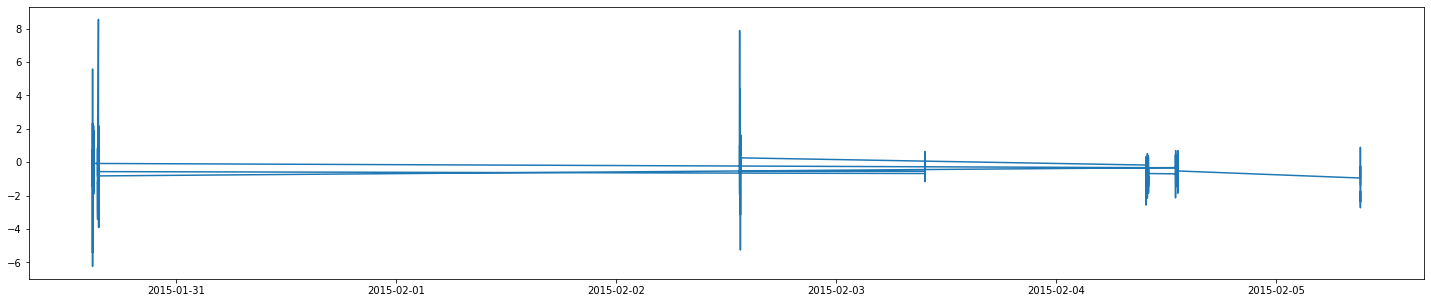

In [80]:
plt.figure(figsize=(25, 5))
plt.plot(m1_sphone_df.datetime, m1_sphone_df.AccelerationX)

The data is not sorted.

In [81]:
# Sort the dataframe
m1_sphone_df = m1_sphone_df.sort_values(by='datetime')

In [82]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

rng = range(0, 2000)

fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True)

fig.add_trace(go.Scatter(
    x = m1_sphone_df.iloc[rng]['datetime'],
    y = m1_sphone_df.iloc[rng]['AccelerationX'],
    name= 'Acceleration X',
), 
row=1, col=1)

fig.add_trace(go.Scatter(
    x = m1_sphone_df.iloc[rng]['datetime'],
    y = m1_sphone_df.iloc[rng]['AccelerationY'],
    name= 'Acceleration Y',
), row=2, col=1)

fig.add_trace(go.Scatter(
    x = m1_sphone_df.iloc[rng]['datetime'],
    y = m1_sphone_df.iloc[rng]['AccelerationZ'],
    name= 'Acceleration Z',
), row=3, col=1)

# fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title_text="Movement evolution on time",)
                    # xaxis_rangeslider_visible=True)
fig.show()

In [83]:
rng = range(0, 2000)
fig = px.line(m1_sphone_df.iloc[rng], x='datetime', y='AccelerationX', title='Time Series of acceleration in x')

fig.update_xaxes(rangeslider_visible=True)
fig.show()